In [57]:
import pandas as pd

Location = "GleeClubData_new.xlsx"
df = pd.read_excel(Location)
df.head()

,team_size,mTof_team,enrollment,mTof_school,population_district,practices,competitions,score
0,9,1.1,469,0.5,11432,1,3,3.160421
1,12,0.9,2028,1.1,64874,12,7,4.789190
2,23,1.4,1393,1.4,13843,10,3,3.676977
3,17,0.9,425,0.8,40959,9,0,3.641177
4,37,0.5,2111,1.0,26203,15,4,4.164019


In [58]:
df.corr()

,team_size,mTof_team,enrollment,mTof_school,population_district,practices,competitions,score
team_size,1.000000,0.039261,-0.002032,-0.027581,-0.027813,0.017570,-0.017728,0.037383
mTof_team,0.039261,1.000000,0.014302,-0.022603,-0.043413,-0.039693,0.060830,-0.019025
enrollment,-0.002032,0.014302,1.000000,-0.007546,0.063731,-0.043782,-0.076423,0.031495
mTof_school,-0.027581,-0.022603,-0.007546,1.000000,0.030516,0.002079,-0.048233,0.004502
population_district,-0.027813,-0.043413,0.063731,0.030516,1.000000,0.018413,-0.083559,0.437973
practices,0.017570,-0.039693,-0.043782,0.002079,0.018413,1.000000,0.028975,0.634882
competitions,-0.017728,0.060830,-0.076423,-0.048233,-0.083559,0.028975,1.000000,0.474863
score,0.037383,-0.019025,0.031495,0.004502,0.437973,0.634882,0.474863,1.000000


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead


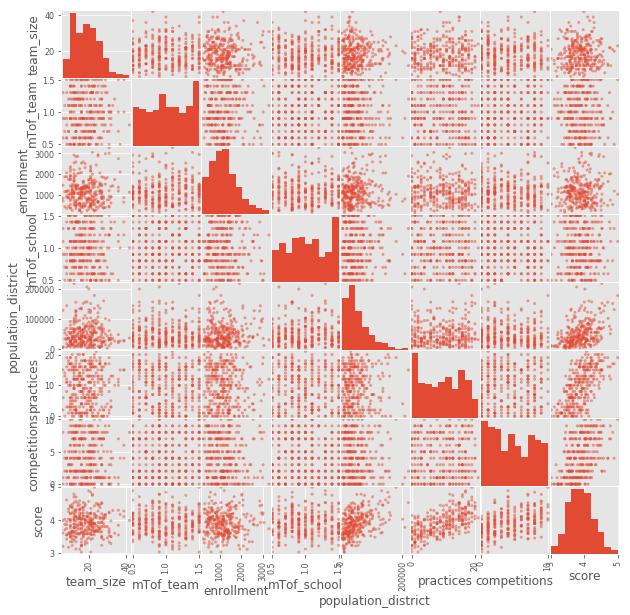

In [64]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
pd.scatter_matrix(df, figsize=(10, 10))
plt.show()

In [65]:
# From the correlation map above it looks like the score mainly depends 
# on number of practices and competitions, and to a lesser extent to population

import statsmodels.formula.api as sm
result = sm.ols(formula='score ~  population_district + practices + competitions -1', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1057.
Date:                Fri, 05 Oct 2018   Prob (F-statistic):          4.17e-158
Time:                        18:47:41   Log-Likelihood:                -466.23
No. Observations:                 300   AIC:                             938.5
Df Residuals:                     297   BIC:                             949.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
population_district  1.905e-05   1.43e-06     13.330      0.000    1.62e-05    2.19e-05
practices               0.1462      0.009     15.916      0.000       0.128       0.164
competitions            0.2619      0.019     14.037      0.000       0.225       0.299
==============================================================================
Omnibus:                        6.387   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                6.170
Skew:                          -0.311   Prob(JB):                       0.0457
Kurtosis:                       3.328   Cond. No.                     1.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
# Redo the fit without population

import statsmodels.formula.api as sm
result = sm.ols(formula='score ~ practices + competitions -1', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     939.6
Date:                Fri, 05 Oct 2018   Prob (F-statistic):          2.04e-129
Time:                        18:48:15   Log-Likelihood:                -536.57
No. Observations:                 300   AIC:                             1077.
Df Residuals:                     298   BIC:                             1085.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
practices        0.2010      0.010     19.368      0.000       0.181       0.221
competitions     0.3279      0.023     14.442      0.000       0.283       0.373
==============================================================================
Omnibus:                        4.777   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                3.167
Skew:                          -0.056   Prob(JB):                        0.205
Kurtosis:                       2.509   Cond. No.                         3.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Create a new dataframe with all the rows sorted by score (ascending)

df2 = df.sort_values(by=['score'])
df2.tail()

,team_size,mTof_team,enrollment,mTof_school,population_district,practices,competitions,score
93,22,0.9,770,1.3,50830,16,9,4.779017
1,12,0.9,2028,1.1,64874,12,7,4.789190
228,21,1.0,558,0.8,152228,17,8,4.846908
185,20,0.5,1198,1.3,131816,17,4,4.893740
32,23,1.5,1049,1.1,179276,19,10,4.997248


In [88]:
# Find a "winning" model, based on the criterium that score must be > 4.25
# Create a new dataframe with all rows sorted by ascending score and score > 4.25

df3 = df2[df2['score'] >= 4.25]
df3.head()

,team_size,mTof_team,enrollment,mTof_school,population_district,practices,competitions,score
40,9,0.7,871,1.3,35337,17,5,4.252429
58,25,1.4,403,0.8,37087,12,9,4.268102
25,39,1.0,881,1.4,25810,15,6,4.270100
127,13,0.7,672,1.1,99967,7,8,4.289452
274,33,1.1,1454,0.6,35084,13,4,4.291681


In [89]:
# Have a look at the minima and maxima in the variable values

print(min(df3['practices']))
print(max(df3['practices']))

print(min(df3['competitions']))
print(max(df3['competitions']))

6
20
2
10


In [90]:
# I appears that the variable values are too broadly distributed
# Try eliminating the outliers

mean1 = df3['practices'].mean()
std1 =  df3['practices'].std()
toprange1 = mean1 + std1 * 1.96
botrange1 = mean1 - std1 * 1.96

mean2 = df3['competitions'].mean()
std2 = df3['competitions'].std()
toprange2 = mean2 + std2 * 1.96
botrange2 = mean2 - std2 * 1.96

copydf3 = df3
copydf3 = copydf3.drop(copydf3[copydf3['practices'] > toprange1].index)
copydf3 = copydf3.drop(copydf3[copydf3['practices'] < botrange1].index)

copydf3 = copydf3.drop(copydf3[copydf3['competitions'] > toprange2].index)
copydf3 = copydf3.drop(copydf3[copydf3['competitions'] < botrange2].index)
copydf3.head()

,team_size,mTof_team,enrollment,mTof_school,population_district,practices,competitions,score
40,9,0.7,871,1.3,35337,17,5,4.252429
58,25,1.4,403,0.8,37087,12,9,4.268102
25,39,1.0,881,1.4,25810,15,6,4.270100
274,33,1.1,1454,0.6,35084,13,4,4.291681
267,12,1.3,632,1.1,12796,14,9,4.295602


In [91]:
# Have a look at the minima and maxima in the variable values, again

print(min(copydf3['practices']))
print(max(copydf3['practices']))

print(min(copydf3['competitions']))
print(max(copydf3['competitions']))

9
20
2
10


In [92]:
df4=copydf3[copydf3['practices'] == 9]
df5=copydf3[copydf3['competitions'] == 2]
print('For only 9 practices, the team needs a minimum of', min(df4['competitions']), 'competitions.')
print('For only 2 competitions, the team needs a minimum of', min(df5['practices']), 'practices.')

For only 9 practices, the team needs a minimum of 4 competitions.
For only 2 competitions, the team needs a minimum of 15 practices.
